<a href="https://colab.research.google.com/github/Nikhil0417/Deep-Learning/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [2]:
from tensorflow import keras
print(keras.__version__)

2.3.0-tf


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
X_train, X_validation = X_train_full[:50000]/255.0, X_train_full[50000:]/255.0
y_train, Y_validation = y_train_full[:50000], y_train_full[50000:]
X_test = X_test/255.0

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Ankle boot'

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, 'relu'))
model.add(keras.layers.Dense(300, 'relu'))
model.add(keras.layers.Dense(10, 'softmax'))

In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [17]:
l = model.layers

In [18]:
l[0]

In [21]:
weights, biases = l[1].get_weights()

In [22]:
weights

array([[ 0.04518321, -0.005192  , -0.02712432, ..., -0.00811218,
        -0.04443865, -0.00176747],
       [ 0.02117662, -0.04119157, -0.01147109, ..., -0.03583678,
         0.02566244, -0.06845032],
       [ 0.0024021 , -0.04068159,  0.06762558, ...,  0.04769695,
         0.06666358, -0.00716943],
       ...,
       [-0.03735418,  0.03461762, -0.01882488, ...,  0.03058373,
         0.04559806,  0.06103037],
       [ 0.03233566,  0.04701709,  0.0699605 , ...,  0.05979992,
        -0.02877522,  0.00538564],
       [ 0.06512193,  0.03893134,  0.0031122 , ..., -0.0016263 ,
         0.03248034,  0.05853234]], dtype=float32)

In [27]:
#training the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, Y_validation))

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1657 - accuracy: 0.9413 - val_loss: 0.3337 - val_accuracy: 0.8864
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1625 - accuracy: 0.9427 - val_loss: 0.3106 - val_accuracy: 0.8921
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1590 - accuracy: 0.9443 - val_loss: 0.3112 - val_accuracy: 0.8922
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1563 - accuracy: 0.9453 - val_loss: 0.3165 - val_accuracy: 0.8938
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1543 - accuracy: 0.9453 - val_loss: 0.3294 - val_accuracy: 0.8900
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1526 - accuracy: 0.9456 - val_loss: 0.3313 - val_accuracy: 0.8903
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1491 - accuracy: 0.9469 - val_loss: 0.3128 - val_accuracy:

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


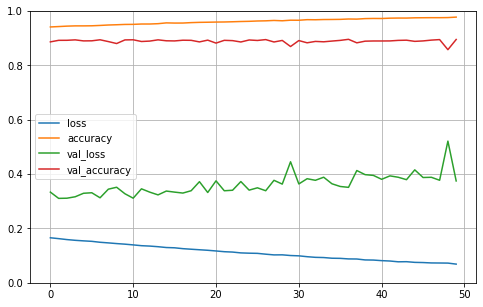

In [32]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 3.5077 - accuracy: 0.1000


[3.507737159729004, 0.10000000149011612]